# Importing the resources

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
print("Tensorflow: ",tf.__version__)
print("Keras: ",tf.keras.__version__)

Tensorflow:  2.1.0
Keras:  2.2.4-tf


# Load the dataset

In [6]:
training_set,dataset_info = tfds.load('mnist',split='train',as_supervised=True,with_info=True)

# Create Pipeline

In [8]:
def normalize(image,label):
    image = tf.cast(image,tf.float32)
    image = image/255
    return image,label

num_training_examples = dataset_info.splits['train'].num_examples
batch_size = 64
training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalize).prefetch(1)

# Build the model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# Getting the model ready for training

In [16]:
# We use the .compile method to set parameters to train our model.
# optimizer: We generally use the AdamOptimizer
# Loss function: the function on which we plan to apply gradient descent on
# Metrics: There are a variety of accuracy methods, but here we will stick to the accuracy measure

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Looking at loss and accuracy before training

In [21]:
for image_batch,label_batch in training_batches.take(1):
    loss,accuracy = model.evaluate(image_batch,label_batch)
print("Loss before training: ",loss)
print("Accuracy before training: ",accuracy)

64/64 [==============================] - 0s 66us/sample - loss: 2.4497 - accuracy: 0.0938
Loss before training:  2.4497251510620117
Accuracy before training:  0.09375


# Training the model

In [22]:
EPOCHS = 5
history = model.fit(training_batches,epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 10s 10ms/step - loss: 0.2818 - accuracy: 0.9179
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1156 - accuracy: 0.9649
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0813 - accuracy: 0.9754
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0607 - accuracy: 0.9809
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0487 - accuracy: 0.9849


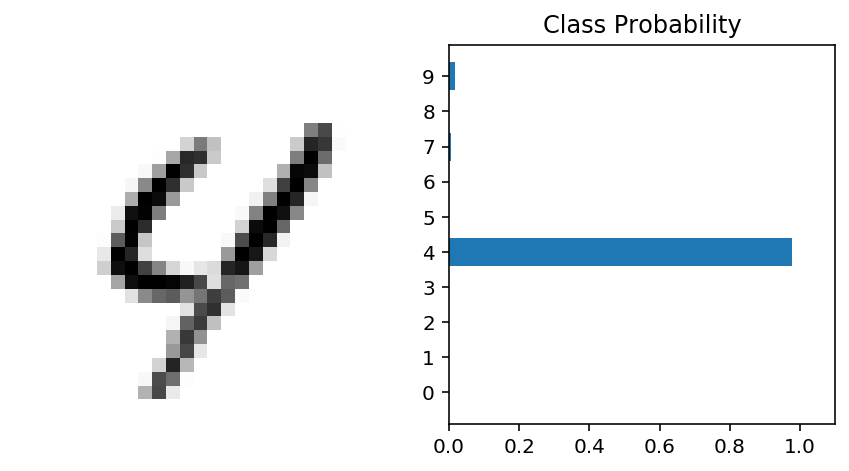

In [26]:
for image_batch, label_batch in training_batches.take(1):
    ps = model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[2]
  
  
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps[2])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

In [27]:
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = model.evaluate(image_batch, label_batch)

print('\nLoss after training: {:,.3f}'.format(loss))
print('Accuracy after training: {:.3%}'.format(accuracy))

64/64 [==============================] - 0s 69us/sample - loss: 0.1101 - accuracy: 0.9688

Loss after training: 0.110
Accuracy after training: 96.875%


# Making the model

In [31]:
## Solution
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
             metrics=['accuracy'],
             loss='sparse_categorical_crossentropy')

for image_batch, label_batch in training_batches.take(1):
#     print(model.evaluate(image_batch,label_batch))
    loss, accuracy = model.evaluate(image_batch, label_batch)
print('\nLoss before training: {:,.3f}'.format(loss))
print('Accuracy before training: {:.3%}'.format(accuracy))

64/64 [==============================] - 0s 1ms/sample - loss: 2.3251 - accuracy: 0.1094

Loss before training: 2.325
Accuracy before training: 10.938%


# Training the model

In [33]:
EPOCHS = 5
history = model.fit(training_batches,epochs=EPOCHS)

for image_batch, label_batch in training_batches.take(1):
#     print(model.evaluate(image_batch,label_batch))
    loss, accuracy = model.evaluate(image_batch, label_batch)
print('\nLoss before training: {:,.3f}'.format(loss))
print('Accuracy before training: {:.3%}'.format(accuracy))

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0384 - accuracy: 0.9880
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0341 - accuracy: 0.9890
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0263 - accuracy: 0.9913
Epoch 5/5
64/64 [==============================] - 0s 71us/sample - loss: 0.0099 - accuracy: 1.0000

Loss before training: 0.010
Accuracy before training: 100.000%


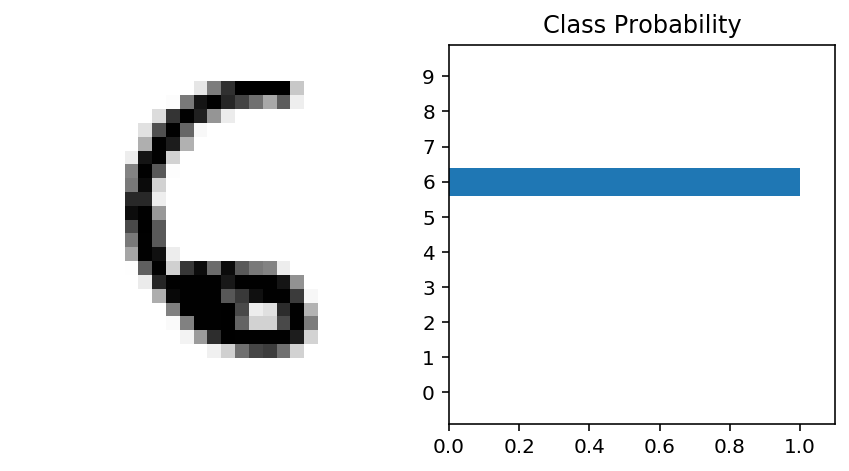

In [35]:
for image_batch, label_batch in training_batches.take(1):
    ps = model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[2]
  
  
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps[2])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()